In [58]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, t
import pyrsm as rsm
import matplotlib.pyplot as plt
from cycler import cycler

plt.rcParams['axes.prop_cycle'] = cycler(color=['#375a7f']) 


In [59]:
df = pd.read_stata('karlan_list_2007.dta')

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
treatment,50083.0,0.666813,0.471357,0.000000,0.000000,1.000000,1.000000,1.000000
control,50083.0,0.333187,0.471357,0.000000,0.000000,0.000000,1.000000,1.000000
ratio2,50083.0,0.222311,0.415803,0.000000,0.000000,0.000000,0.000000,1.000000
ratio3,50083.0,0.222211,0.415736,0.000000,0.000000,0.000000,0.000000,1.000000
size25,50083.0,0.166723,0.372732,0.000000,0.000000,0.000000,0.000000,1.000000
size50,50083.0,0.166623,0.372643,0.000000,0.000000,0.000000,0.000000,1.000000
size100,50083.0,0.166723,0.372732,0.000000,0.000000,0.000000,0.000000,1.000000
sizeno,50083.0,0.166743,0.372750,0.000000,0.000000,0.000000,0.000000,1.000000
askd1,50083.0,0.222311,0.415803,0.000000,0.000000,0.000000,0.000000,1.000000
askd2,50083.0,0.222291,0.415790,0.000000,0.000000,0.000000,0.000000,1.000000


In [61]:
test_variables = ['hpa', 'freq', 'female', 'redcty', 'bluecty']

for var in test_variables:
    control = df.loc[df.treatment == 0, var].dropna()
    treatment = df.loc[df.treatment == 1, var].dropna()

    t_stat_manual = np.divide(
        (control.mean() - treatment.mean()),
        np.sqrt(
            (treatment.var(ddof=1) / len(treatment)) +
            (control.var(ddof=1) / len(control))
        )
    )
    pval_manual = 2 * (1 - t.cdf(np.abs(t_stat_manual), df=len(control) + len(treatment) - 2))

    t_stat, pval = ttest_ind(control, treatment)
    print(f'''
T-test results for {var}:

t-statistic (manual): {t_stat_manual}
t-statistic (scipy): {t_stat}
p-value (manual): {pval_manual}
p-value (scipy): {pval}
''')
    m = rsm.model.regress(data=df,
                      rvar=var,
                      evar=['treatment'],
    )
    print(f'Linear regression results for {var}:')

    print(m.summary(main=False))
    print(f'''
At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} the null hypothesis
that the mean value from the two samples are equal.
---------------------------------------------------''')


T-test results for hpa:

t-statistic (manual): -0.9703896722043864
t-statistic (scipy): -0.944145044786662
p-value (manual): 0.33185698112371353
p-value (scipy): 0.34510008823759086

Linear regression results for hpa:

R-squared: 0.0, Adjusted R-squared: -0.0
F-statistic: 0.891 df(1, 50081), p.value 0.345
Nr obs: 50,083
None

At the 95% confidence level, we fail to reject the null hypothesis
that the mean value from the two samples are equal.
---------------------------------------------------

T-test results for freq:

t-statistic (manual): 0.11084502380904246
t-statistic (scipy): 0.11089297035979982
p-value (manual): 0.9117396856546793
p-value (scipy): 0.9117016644344591

Linear regression results for freq:

R-squared: 0.0, Adjusted R-squared: -0.0
F-statistic: 0.012 df(1, 50081), p.value 0.912
Nr obs: 50,083
None

At the 95% confidence level, we fail to reject the null hypothesis
that the mean value from the two samples are equal.
---------------------------------------------------

The results of the t-test and linear regression analysis on these explanatory variables affirm that that treatment and control groups are not statistically significantly different, at the 95% confidence level.

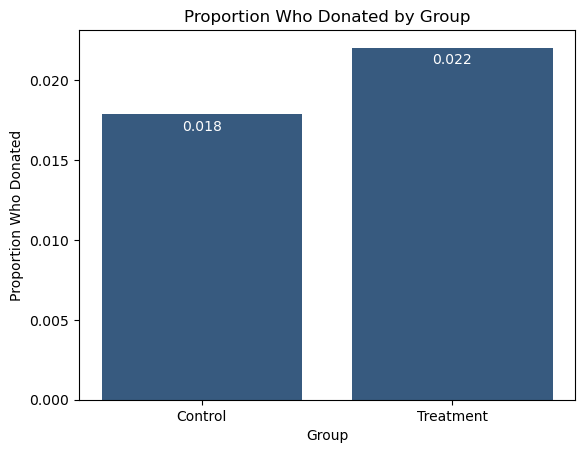

In [62]:
gave_df = df.groupby('treatment')['gave'].mean()
gave_df.index = gave_df.index.map({0: 'Control', 1: 'Treatment'})

plt.bar(gave_df.index, gave_df.values)
plt.title('Proportion Who Donated by Group')
plt.xlabel('Group')
plt.ylabel('Proportion Who Donated')
for i, v in enumerate(gave_df.values):
    plt.text(i, v-0.001, f"{v:.3f}", ha='center', color='white')
plt.show()


In [63]:
control = df.loc[df.treatment == 0, 'gave'].dropna()
treatment = df.loc[df.treatment == 1, 'gave'].dropna()

t_stat, pval = ttest_ind(control, treatment)

print(f'''
t-statistic: {t_stat}
p-value: {pval}

At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} the null hypothesis that the response rate of the two samples are equal.''')


t-statistic: -3.101361000543946
p-value: 0.0019274025949016982

At the 95% confidence level, we reject the null hypothesis that the response rate of the two samples are equal.


In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

probit_model = smf.probit('gave ~ treatment', data=df).fit()
print(f'''Probit Regression Results:
      
t-statistic: {probit_model.tvalues['treatment']}
p-value: {probit_model.pvalues['treatment']}''')

Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7
Probit Regression Results:
      
t-statistic: 3.1129300737950434
p-value: 0.0018523990147782177


Given the low p-value from both the t-test and probit regression, we can conclude that people are more likely to respond to a request for charitable donations when informed that their donations will be met with a matching donation. 

In [65]:
df['ratio'] = df['ratio'].astype(str)
df['ratio'] = pd.Categorical(
    df['ratio'], categories=['Control', '1', '2', '3'], ordered=True
    )

In [66]:
ratio_df = df.groupby('ratio')['gave'].mean()
display(ratio_df)

/tmp/ipykernel_27584/157019139.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = df.groupby('ratio')['gave'].mean()


ratio
Control    0.017858
1          0.020749
2          0.022633
3          0.022733
Name: gave, dtype: float64

In [67]:
ratios = ratio_df.index.values[1:]
ratios

['1', '2', '3']
Categories (4, object): ['Control' < '1' < '2' < '3']

In [68]:
ratios = ratio_df.index.values[1:]
for i in range(len((ratios))):

    r1 = ratios[i]
    r2 = ratios[i + 1] if i + 1 < len(ratios) else ratios[0]

    group1 = df.loc[df.ratio == r1, 'gave'].dropna()
    group2 = df.loc[df.ratio == r2, 'gave'].dropna()

    t_stat, pval = ttest_ind(group1, group2)
    print(f'''
Response rate for {r1}:1  {group1.mean()}
Response rate for {r2}:1  {group2.mean()}

t-statistic: {t_stat}
p-value: {pval}

At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} the null 
hypothesis that the response rate of ratios {r1}:1 and {r2}:1 are equal.
---------------------------------------------------''')


Response rate for 1:1  0.020749124225276205
Response rate for 2:1  0.0226333752469912

t-statistic: -0.96504713432247
p-value: 0.33453168549723933

At the 95% confidence level, we fail to reject the null 
hypothesis that the response rate of ratios 1:1 and 2:1 are equal.
---------------------------------------------------

Response rate for 2:1  0.0226333752469912
Response rate for 3:1  0.022733399227244138

t-statistic: -0.05011583793874515
p-value: 0.9600305283739325

At the 95% confidence level, we fail to reject the null 
hypothesis that the response rate of ratios 2:1 and 3:1 are equal.
---------------------------------------------------

Response rate for 3:1  0.022733399227244138
Response rate for 1:1  0.020749124225276205

t-statistic: 1.0150255853798622
p-value: 0.3101046637086672

At the 95% confidence level, we fail to reject the null 
hypothesis that the response rate of ratios 3:1 and 1:1 are equal.
---------------------------------------------------


In [69]:
g1 = '2'
g2 = '3'

group1 = df.loc[df.ratio == g1, 'gave'].dropna()
group2 = df.loc[df.ratio == g2, 'gave'].dropna()

t_stat, pval = ttest_ind(group1, group2)
print(f'''
    Response rate for {g1}:1 - {group1.mean()}
    Response rate for {g2}:1 - {group2.mean()}
    t-statistic: {t_stat}
    p-value: {pval}

    At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} 
    the null hypothesis that the response rate of ratio {g1}:1 and {g2}:1 are equal.''')


    Response rate for 2:1 - 0.0226333752469912
    Response rate for 3:1 - 0.022733399227244138
    t-statistic: -0.05011583793874515
    p-value: 0.9600305283739325

    At the 95% confidence level, we fail to reject 
    the null hypothesis that the response rate of ratio 2:1 and 3:1 are equal.


In [70]:
g1 = '1'
g2 = '3'

group1 = df.loc[df.ratio == g1, 'gave'].dropna()
group2 = df.loc[df.ratio == g2, 'gave'].dropna()

t_stat, pval = ttest_ind(group1, group2)
print(f'''
    Response rate for {g1}:1 - {group1.mean()}
    Response rate for {g2}:1 - {group2.mean()}
    t-statistic: {t_stat}
    p-value: {pval}

    At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} 
    the null hypothesis that the response rate of ratio {g1}:1 and {g2}:1 are equal.''')


    Response rate for 1:1 - 0.020749124225276205
    Response rate for 3:1 - 0.022733399227244138
    t-statistic: -1.0150255853798622
    p-value: 0.3101046637086672

    At the 95% confidence level, we fail to reject 
    the null hypothesis that the response rate of ratio 1:1 and 3:1 are equal.


In [71]:
probit_model2 = smf.probit('gave ~ ratio', data=df).fit()

print(f'''
coefficients: 
{probit_model2.params}

t-statistic: 
{probit_model2.tvalues}

p-value: 
{probit_model2.pvalues}''')

Optimization terminated successfully.
         Current function value: 0.100430
         Iterations 7

coefficients: 
Intercept    -2.100141
ratio[T.1]    0.061624
ratio[T.2]    0.097974
ratio[T.3]    0.099831
dtype: float64

t-statistic: 
Intercept    -90.072770
ratio[T.1]     1.725748
ratio[T.2]     2.792255
ratio[T.3]     2.847311
dtype: float64

p-value: 
Intercept     0.000000
ratio[T.1]    0.084393
ratio[T.2]    0.005234
ratio[T.3]    0.004409
dtype: float64


In [72]:
for param, coef, tval, pval in zip(
    probit_model2.params.index,
    probit_model2.params.values,
    probit_model2.tvalues,
    probit_model2.pvalues
):
    print(f"{param:<15}  coef: {coef:>8.4f}  t-stat: {tval:>8.3f}  pval: {pval:>8.4f}")

Intercept        coef:  -2.1001  t-stat:  -90.073  pval:   0.0000
ratio[T.1]       coef:   0.0616  t-stat:    1.726  pval:   0.0844
ratio[T.2]       coef:   0.0980  t-stat:    2.792  pval:   0.0052
ratio[T.3]       coef:   0.0998  t-stat:    2.847  pval:   0.0044


In [73]:
pm2_df = pd.DataFrame({
    'coef': probit_model2.params,
    't-stat': probit_model2.tvalues,
    'pval': probit_model2.pvalues
})

display(pm2_df)

,coef,t-stat,pval
Intercept,-2.100141,-90.072770,0.000000
ratio[T.1],0.061624,1.725748,0.084393
ratio[T.2],0.097974,2.792255,0.005234
ratio[T.3],0.099831,2.847311,0.004409


In [87]:
treatment_df = df.loc[df.treatment == 1]
treatment_df = treatment_df[['gave', 'ratio']].dropna()
treatment_df['ratio'] = pd.Categorical(
    treatment_df['ratio'], categories=['1', '2', '3'], ordered=True
)

probit_model3 = smf.probit('gave ~ ratio', data=treatment_df).fit(disp=False)

pm3_df = pd.DataFrame({
    'coef': probit_model3.params,
    't-stat': probit_model3.tvalues,
    'pval': probit_model3.pvalues
})
display(pm3_df)

,coef,t-stat,pval
Intercept,-2.038517,-75.373213,0.000000
ratio[T.2],0.036350,0.964972,0.334559
ratio[T.3],0.038207,1.014933,0.310138


In [75]:
print(f'Difference between 3:1 response rate and 2:1 response rate: {ratio_df['3'] - ratio_df['2']}')
print(f'Difference between 2:1 response rate and 1:1 response rate: {ratio_df['2'] - ratio_df['1']}')


Difference between 3:1 response rate and 2:1 response rate: 0.00010002398025293902
Difference between 2:1 response rate and 1:1 response rate: 0.0018842510217149944


In [76]:
coefs = probit_model2.params

# Coefficients: interpreted as difference from 'Control'
coef_1 = coefs['ratio[T.1]']
coef_2 = coefs['ratio[T.2]']
coef_3 = coefs['ratio[T.3]']

# Compute pairwise differences between levels
diff_3_vs_2 = coef_3 - coef_2
diff_2_vs_1 = coef_2 - coef_1

print(f"3:1 vs 2:1 difference (from regression): {diff_3_vs_2:.4f}")
print(f"2:1 vs 1:1 difference (from regression): {diff_2_vs_1:.4f}")


3:1 vs 2:1 difference (from regression): 0.0019
2:1 vs 1:1 difference (from regression): 0.0363


In [77]:
mfx = probit_model2.get_margeff()
print(mfx.summary())

       Probit Marginal Effects       
Dep. Variable:                   gave
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ratio[T.1]     0.0031      0.002      1.724      0.085      -0.000       0.007
ratio[T.2]     0.0049      0.002      2.786      0.005       0.001       0.008
ratio[T.3]     0.0050      0.002      2.841      0.004       0.002       0.008


In [ ]:
marginal_effects = mfx.margeff
print("Marginal effects by ratio level:", marginal_effects)

# Compare 2:1 to 1:1, 3:1 to 2:1
diff_2_vs_1 = marginal_effects[1] - marginal_effects[0]
diff_3_vs_2 = marginal_effects[2] - marginal_effects[1]

print(f"Estimated increase from 1:1 to 2:1: {diff_2_vs_1:.4f}")
print(f"Estimated increase from 2:1 to 3:1: {diff_3_vs_2:.4f}")

Marginal effects by ratio level: [0.0030624  0.0048688  0.00496109]
Estimated increase from 1:1 to 2:1: 0.0018
Estimated increase from 2:1 to 3:1: 0.0001


In [90]:
control = df.loc[df.treatment == 0, 'amount'].dropna()
treatment = df.loc[df.treatment == 1, 'amount'].dropna()

t_stat, pval = ttest_ind(control, treatment)

print(f'''
T-test Results:
      
Control mean: ${control.mean():,.2f}
Treatment mean: ${treatment.mean():,.2f}
      
t-statistic: {t_stat}
p-value: {pval}

At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} the null
hypothesis that the mean donation amount of the two samples are equal.''')


T-test Results:
      
Control mean: $0.81
Treatment mean: $0.97
      
t-statistic: -1.8605020225753781
p-value: 0.06282038947470686

At the 95% confidence level, we fail to reject the null
hypothesis that the mean donation amount of the two samples are equal.


In [91]:
control = df.loc[(df.treatment == 0) & (df.gave == 1), 'amount'].dropna()
treatment = df.loc[(df.treatment == 1) & (df.gave == 1), 'amount'].dropna()

t_stat, pval = ttest_ind(control, treatment)

print(f'''
T-test Results:
      
Control mean: ${control.mean():,.2f}
Treatment mean: ${treatment.mean():,.2f}

t-statistic: {t_stat}
p-value: {pval}

At the 95% confidence level, we {pval < 0.05 and "reject" or "fail to reject"} the null
hypothesis that the donation amount of the two samples are equal.''')


T-test Results:
      
Control mean: $45.54
Treatment mean: $43.87

t-statistic: 0.5808388615237938
p-value: 0.5614758782284279

At the 95% confidence level, we fail to reject the null
hypothesis that the donation amount of the two samples are equal.


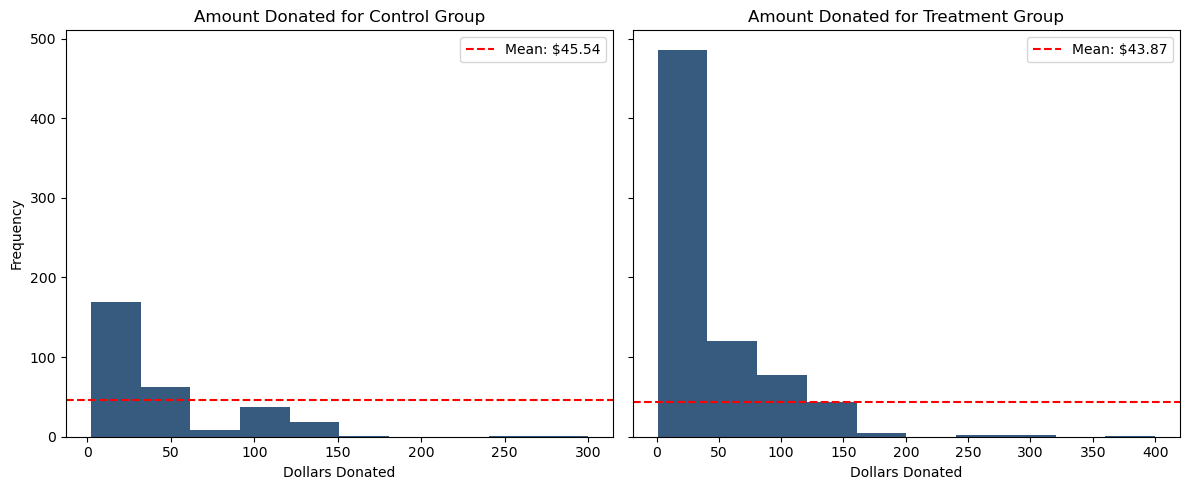

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].set_ylabel("Frequency")

for val in [0, 1]:
    subset = df.loc[(df.gave == 1) & (df.treatment == val)].copy()
    axes[val].hist(subset['amount'], bins=10)
    axes[val].axhline(y=subset['amount'].mean(), color='r', linestyle='--', label=f'Mean: ${subset["amount"].mean():,.2f}')
    axes[val].legend()
    axes[val].set_title(f'Amount Donated for {"Treatment" if val == 1 else "Control"} Group')
    axes[val].set_xlabel("Dollars Donated")

plt.tight_layout()
plt.show()


In [82]:
ctr_p = 0.018
trt_p = 0.022

np.random.seed(12)

sim_ctr = np.random.binomial(n=1, p=ctr_p, size=10_000)
sim_trt = np.random.binomial(n=1, p=trt_p, size=10_000)

sim_diff = sim_trt - sim_ctr
sim_diff_mean = sim_trt.mean() - sim_ctr.mean()

print(sim_diff.mean())
print(sim_diff_mean)

0.005
0.005000000000000001


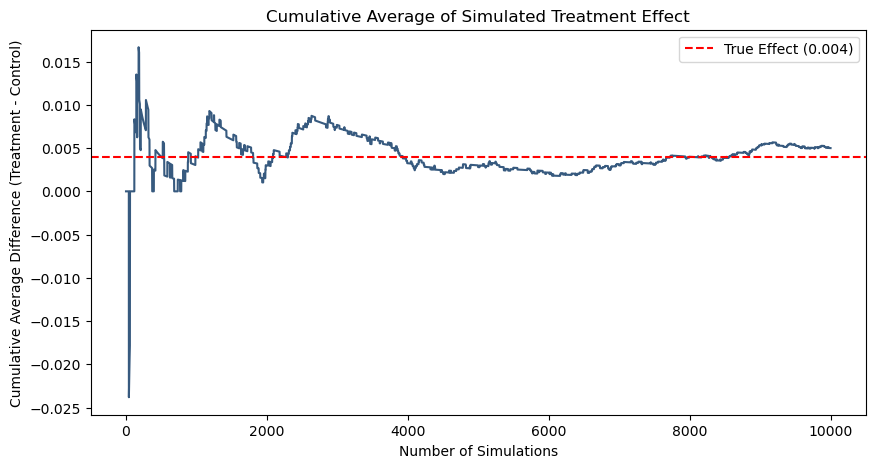

In [94]:
cumulative_avg = np.cumsum(sim_diff) / np.arange(1, len(sim_diff) + 1)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(cumulative_avg)
plt.axhline(y=trt_p - ctr_p, color='red', linestyle='--', label=f'True Effect ({trt_p-ctr_p:.3f})')
plt.title('Cumulative Average of Simulated Treatment Effect')
plt.xlabel('Number of Simulations')
plt.ylabel('Cumulative Average Difference (Treatment - Control)')
plt.legend()

plt.show()

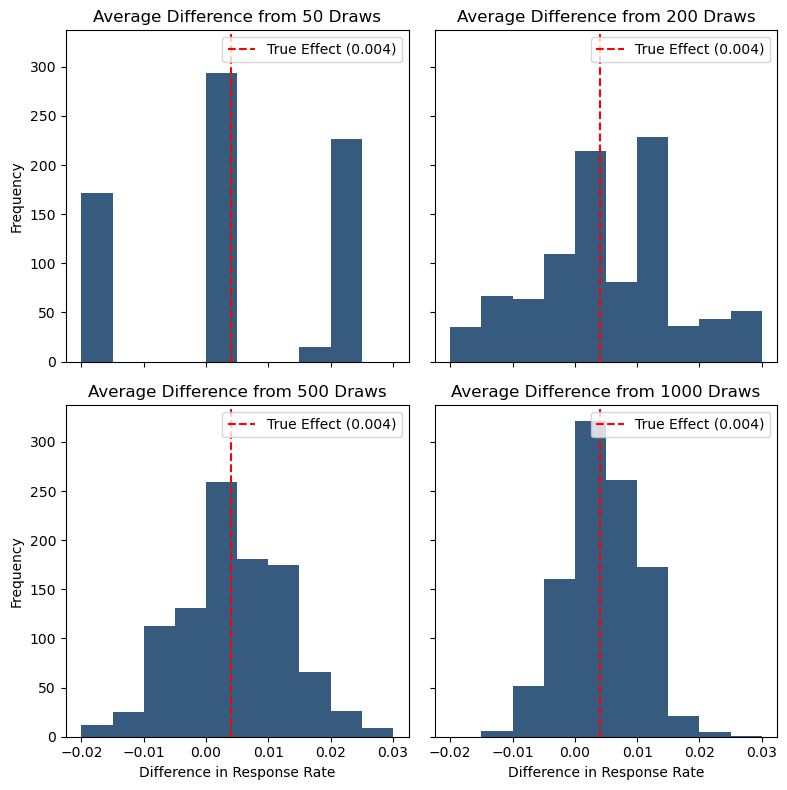

In [112]:


fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharey=True, sharex=True)
axes = axes.flatten()
axes[0].set_ylabel("Frequency")
axes[2].set_ylabel("Frequency")
axes[2].set_xlabel("Difference in Response Rate")
axes[3].set_xlabel("Difference in Response Rate")

for ax, size in enumerate([50, 200, 500, 1000]):
    samples = []
    for i in range(1000):
        sim_ctr = np.random.binomial(n=1, p=ctr_p, size=size)
        sim_trt = np.random.binomial(n=1, p=trt_p, size=size)

        sim_diff_mean = sim_trt.mean() - sim_ctr.mean()
        samples.append(sim_diff_mean)
    
    axes[ax].hist(samples, bins=np.linspace(-0.02, 0.03, 11))
    axes[ax].axvline(x=trt_p - ctr_p, color='red', linestyle='--', label='True Effect (0.004)')
    axes[ax].legend()
    axes[ax].set_title(f'Average Difference from {size} Draws')

plt.tight_layout()
plt.show()
